# Examining the Whisper Dataset

This notebook contains scripts for examining the lengths of the samples in the dataset created for fine-tuning the Whisper model.

In [1]:
from datasets import (
    Audio,
    Dataset,
    DatasetDict,
    load_dataset
)
import numpy as np
import matplotlib.pyplot as plt

/Users/sjhuskey/miniconda3/envs/whisper/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = load_dataset("enenlhet-asr/enenlhet-whisper-dataset")

Generating train split: 3053 examples [00:01, 2745.54 examples/s]
Generating test split: 170 examples [00:00, 4617.81 examples/s]
Generating validation split: 170 examples [00:00, 4610.79 examples/s]


Min length: 1
Max length: 65
Mean length: 13.4
Median length: 13.0
95th percentile: 24.0
99th percentile: 31.0


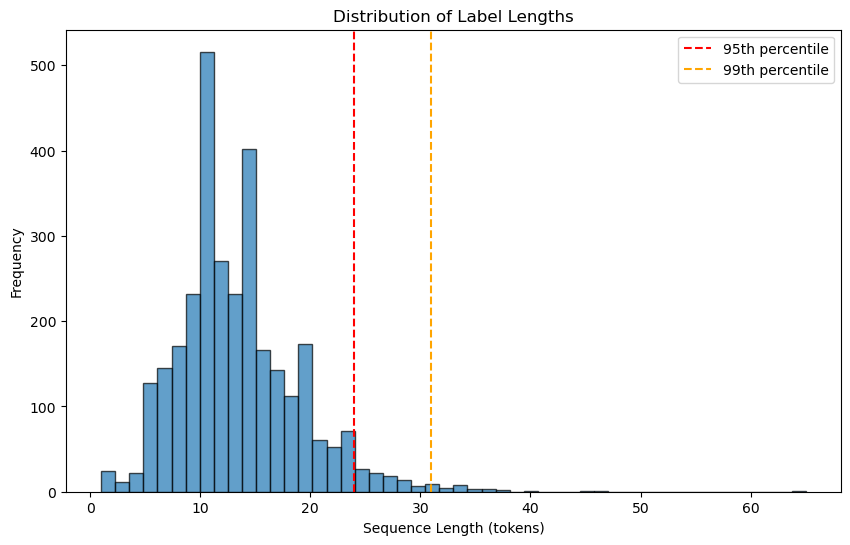

In [ ]:
# Collect all label lengths from the dataset
label_lengths = []
for sample in dataset["train"]:
    if 'labels' in sample:
        label_lengths.append(len(sample['labels']))

# Calculate statistics
lengths = np.array(label_lengths)
print(f"Min length: {lengths.min()}")
print(f"Max length: {lengths.max()}")
print(f"Mean length: {lengths.mean():.1f}")
print(f"Median length: {np.median(lengths):.1f}")
print(f"95th percentile: {np.percentile(lengths, 95):.1f}")
print(f"99th percentile: {np.percentile(lengths, 99):.1f}")

# Plot distribution
plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Sequence Length (tokens)')
plt.ylabel('Frequency')
plt.title('Distribution of Label Lengths')
plt.axvline(np.percentile(lengths, 95), color='red', linestyle='--', label='95th percentile')
plt.axvline(np.percentile(lengths, 99), color='orange', linestyle='--', label='99th percentile')
plt.legend()
plt.show()